# Pandas

In [1]:
import math
from math import floor as floor
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import scipy
from tabulate import tabulate
import seaborn as sns
import collections

### Make Columns like Dictionaries

In [2]:
df = pd.DataFrame({'col_1':[0,1,2], 'col_2':[0,1,2], 'col_3':[1,2,3]})
df.head()

col_1  col_2  col_3
0      0      0      1
1      1      1      2
2      2      2      3

## Append Columns

In [3]:
df2 = pd.DataFrame({'amount spent':[0,1,2], 'date':['11/11/1111', '22/22/2222', '33/33/3333'], 'amount bought':['1/8th', '1 g', '1 g']})

new_value = [0,1,2]

for index, row in df2.iterrows():
     df2.at[index, 'new_column'] = new_value[index]

df2

amount spent        date amount bought  new_column
0             0  11/11/1111         1/8th         0.0
1             1  22/22/2222           1 g         1.0
2             2  33/33/3333           1 g         2.0

In [4]:
df2['another_new_column'] = ['hey', 'yo', 'what\'s up'] #The column has to match the length of the number of rows

new_row = {'amount spent':69, 'date':'44/44/4444', 'amount bought':'2 g', 'new_column':3, 'another_new_column':'not much'} # a new row has to match the number of columns

df2 = df2.append(new_row, ignore_index=True)

df2

amount spent        date amount bought  new_column another_new_column
0             0  11/11/1111         1/8th         0.0                hey
1             1  22/22/2222           1 g         1.0                 yo
2             2  33/33/3333           1 g         2.0          what's up
3            69  44/44/4444           2 g         3.0           not much

## Sort By Value

In [5]:
newer_row = {'amount spent':math.nan, 'date':'', 'amount bought':'', 'new_column':math.nan, 'another_new_column':''}

df2 = df2.append(newer_row, ignore_index=True)
df2.sort_values(by='amount spent', na_position='first')

amount spent        date amount bought  new_column another_new_column
4           NaN                                   NaN                   
0           0.0  11/11/1111         1/8th         0.0                hey
1           1.0  22/22/2222           1 g         1.0                 yo
2           2.0  33/33/3333           1 g         2.0          what's up
3          69.0  44/44/4444           2 g         3.0           not much

## Query dataframe

In [6]:
df2.query('new_column>0')

amount spent        date amount bought  new_column another_new_column
1           1.0  22/22/2222           1 g         1.0                 yo
2           2.0  33/33/3333           1 g         2.0          what's up
3          69.0  44/44/4444           2 g         3.0           not much

## Display DataFrame with Tabulate

In [7]:
cool_fmts = ['psql', 'html', 'fancy_grid', 'latex_raw'] # fancy grid is the best by far

for i in range(len(cool_fmts)):
    print('Format: ' + cool_fmts[i])
    print(tabulate(df, tablefmt = cool_fmts[i])) # the important line
    print('\n')

Format: psql
+---+---+---+---+
| 0 | 0 | 0 | 1 |
| 1 | 1 | 1 | 2 |
| 2 | 2 | 2 | 3 |
+---+---+---+---+


Format: html
<table>
<tbody>
<tr><td style="text-align: right;">0</td><td style="text-align: right;">0</td><td style="text-align: right;">0</td><td style="text-align: right;">1</td></tr>
<tr><td style="text-align: right;">1</td><td style="text-align: right;">1</td><td style="text-align: right;">1</td><td style="text-align: right;">2</td></tr>
<tr><td style="text-align: right;">2</td><td style="text-align: right;">2</td><td style="text-align: right;">2</td><td style="text-align: right;">3</td></tr>
</tbody>
</table>


Format: fancy_grid
╒═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 1 │
├───┼───┼───┼───┤
│ 1 │ 1 │ 1 │ 2 │
├───┼───┼───┼───┤
│ 2 │ 2 │ 2 │ 3 │
╘═══╧═══╧═══╧═══╛


Format: latex_raw
\begin{tabular}{rrrr}
\hline
 0 & 0 & 0 & 1 \\
 1 & 1 & 1 & 2 \\
 2 & 2 & 2 & 3 \\
\hline
\end{tabular}




## Generate Fake Data and Plot

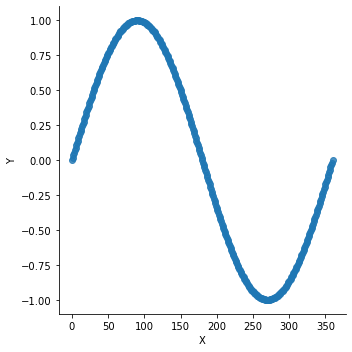

In [7]:
plot = pd.DataFrame({'X':np.linspace(0,360,361), 'Y':[np.sin(2*np.pi*(i) / 360) for i in range(361)]})
sns.lmplot('X', 'Y', data=plot, fit_reg=False)

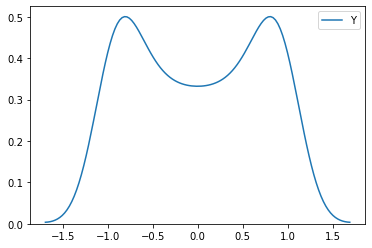

In [8]:
sns.kdeplot(plot.Y)

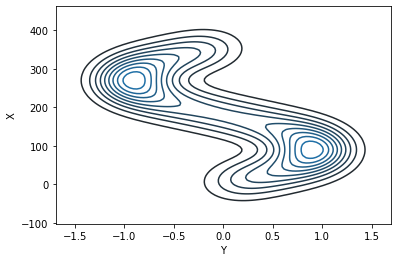

In [47]:
sns.kdeplot(plot.Y, plot.X)

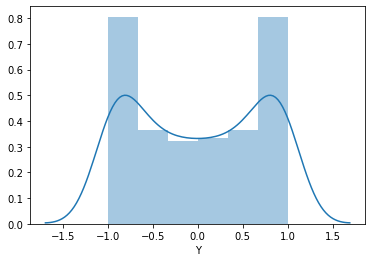

In [48]:
sns.distplot(plot.Y)

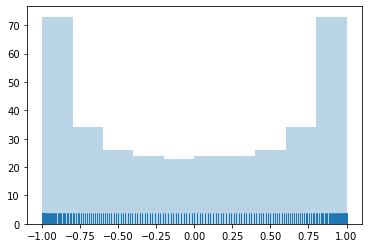

In [49]:
plt.hist(plot.Y, alpha=.3)
sns.rugplot(plot.Y);

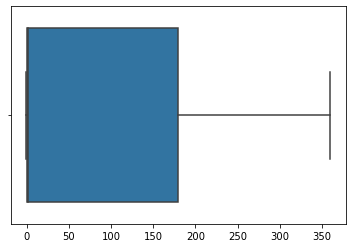

In [50]:
sns.boxplot([plot.Y, plot.X])

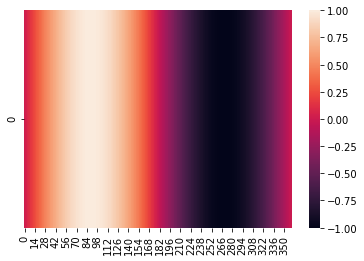

In [51]:
sns.heatmap([plot.Y])

# Play with an OpenBCI File

In [9]:
# load data
rnd_file = "OpenBCI-RAW-2021-08-07_00-58-55.txt"
alpha_wave_file = 'OpenBCI-RAW-Alpha-Waves.txt'
clean_gauranteed_alphas_file = 'OpenBCI-RAW-Clean-Guaranteed-Alpha-Waves-.txt'
file = clean_gauranteed_alphas_file

f = open(file)
meta_data = [f.readline() for i in range(4)]
sample_rate = int(meta_data[2][15:18])
print('Sample Rate: ' + str(sample_rate))

egg_df = pd.read_csv(file, skiprows=[0,1,2,3])
egg_df = egg_df.drop(columns=['Sample Index'])

start_crop = 1
end_crop = 'end'

use_crop = ''
while 'y' != use_crop and 'n' != use_crop:
    use_crop = input('Crop Data (y/n) : ')
    if use_crop == 'y':
        egg_df = egg_df.drop(range(start_crop*sample_rate))
        if str(end_c) == 'end':
            egg_df = egg_df.drop(range(1251, egg_df.index[-1]+1))
        elif type(end_c) != 'str':
            
egg_df

Sample Rate: 125
Crop Data (y/n) : y
87057


EXG Channel 0   EXG Channel 1   EXG Channel 2   EXG Channel 3  \
125    146521.582031   201734.859375   478300.687500   339119.226562   
126    147436.218750   203538.914062   479784.984375   341014.476562   
127    146270.531250   201692.484375   478407.937500   339338.625000   
128    146902.453125   202979.929688   479774.296875   340947.421875   
129    146264.625000   202060.476562   479156.296875   340196.390625   
...              ...             ...             ...             ...   
1246   147632.554688   204790.429688   479339.765625   342622.734375   
1247   145967.976562   201760.078125   476832.421875   339619.195312   
1248   147346.628906   204624.140625   478907.390625   342244.523438   
1249   146043.070312   202057.804688   476750.343750   339599.343750   
1250   147285.468750   204350.554688   478328.578125   341607.773438   

       EXG Channel 4   EXG Channel 5   EXG Channel 6   EXG Channel 7  \
125    227897.132812  -329914.945312   124819.828125   491422.593750   
126    229280.062500  -327796.546875   125274.187500   486741.046875   
127    227974.921875  -329508.867188   124457.191406   489628.171875   
128    229548.820312  -327866.273438   125208.210938   488309.625000   
129    228685.687500  -328538.437500   124634.753906   488471.062500   
...              ...             ...             ...             ...   
1246   230063.812500  -327156.562500   124813.921875   488245.781250   
1247   228284.976562  -330671.882812   124348.289062   496543.453125   
1248   229883.039062  -327600.750000   125130.421875   488671.687500   
1249   228108.492188  -330518.460938   124517.273438   494935.734375   
1250   229447.453125  -328184.929688   125165.835938   489646.406250   

       EXG Channel 8   EXG Channel 9  ...   Other.2   Other.3   Other.4  \
125   -289928.039062  -321590.976562  ...       0.0       0.0       0.0   
126   -292713.257812  -324362.789062  ...       0.0       0.0       0.0   
127   -289827.187500  -321378.023438  ...     112.0     127.5      24.0   
128   -292936.406250  -324570.914062  ...       0.0       0.0       0.0   
129   -289497.820312  -320999.296875  ...       0.0       0.0       0.0   
...              ...             ...  ...       ...       ...       ...   
1246  -292158.023438  -324684.117188  ...     120.0     127.5      56.0   
1247  -290820.140625  -323289.351562  ...       0.0       0.0       0.0   
1248  -292768.500000  -325181.929688  ...       0.0       0.0       0.0   
1249  -290658.679688  -322975.546875  ...       0.0       0.0       0.0   
1250  -293298.515625  -325654.007812  ...       0.0       0.0       0.0   

       Other.5   Other.6   Analog Channel 0   Analog Channel 1  \
125        0.0       0.0                0.0                0.0   
126        0.0       0.0                0.0                0.0   
127       15.5      56.0                0.0                0.0   
128        0.0       0.0                0.0                0.0   
129        0.0       0.0                0.0                0.0   
...        ...       ...                ...                ...   
1246      15.5      32.0                0.0                0.0   
1247       0.0       0.0                0.0                0.0   
1248       0.0       0.0                0.0                0.0   
1249       0.0       0.0                0.0                0.0   
1250       0.0       0.0                0.0                0.0   

       Analog Channel 2     Timestamp     Timestamp (Formatted)  
125                 0.0  1.627400e+09   2021-07-27 11:36:03.528  
126                 0.0  1.627400e+09   2021-07-27 11:36:03.528  
127                 0.0  1.627400e+09   2021-07-27 11:36:03.528  
128                 0.0  1.627400e+09   2021-07-27 11:36:03.528  
129                 0.0  1.627400e+09   2021-07-27 11:36:03.528  
...                 ...           ...                       ...  
1246                0.0  1.627400e+09   2021-07-27 11:36:12.177  
1247                0.0  1.627400e+09   2021-07-27 11:3

In [178]:
# egg_df[' EXG Channel 0']
if 'Time' not in egg_df.keys():
    if 'index' not in egg_df.keys():
        egg_df.reset_index(inplace=True) # use this to make a new column for index
    if type(egg_df['index'].divide(sample_rate).iloc[-1]) == np.float64:
        egg_df['index'] = egg_df['index'].divide(sample_rate)
        egg_df = egg_df.rename(columns={'index':'Time'})
egg_df

Time   EXG Channel 0   EXG Channel 1   EXG Channel 2   EXG Channel 3  \
0       1.000   146521.582031   201734.859375   478300.687500   339119.226562   
1       1.008   147436.218750   203538.914062   479784.984375   341014.476562   
2       1.016   146270.531250   201692.484375   478407.937500   339338.625000   
3       1.024   146902.453125   202979.929688   479774.296875   340947.421875   
4       1.032   146264.625000   202060.476562   479156.296875   340196.390625   
...       ...             ...             ...             ...             ...   
1245  697.416   134537.472656   175392.878906   487318.265625   338595.117188   
1246  697.424   134365.804688   175208.343750   487417.500000   338675.578125   
1247  697.432   134350.792969   175009.863281   487269.421875   338392.875000   
1248  697.440   134548.734375   175457.789062   487683.562500   338942.203125   
1249  697.448   134253.691406   174789.386719   486837.609375   337975.523438   

       EXG Channel 4   EXG Channel 5   EXG Channel 6   EXG Channel 7  \
0      227897.132812  -329914.945312   124819.828125   491422.593750   
1      229280.062500  -327796.546875   125274.187500   486741.046875   
2      227974.921875  -329508.867188   124457.191406   489628.171875   
3      229548.820312  -327866.273438   125208.210938   488309.625000   
4      228685.687500  -328538.437500   124634.753906   488471.062500   
...              ...             ...             ...             ...   
1245   278570.507812  -358498.195312   121919.285156   479743.171875   
1246   278174.062500  -358172.554688   121307.203125   475783.687500   
1247   278522.226562  -358699.898438   121863.492188   481380.937500   
1248   278352.164062  -357728.390625   121459.019531   474548.812500   
1249   278296.921875  -359060.367188   122018.531250   482334.703125   

       EXG Channel 8  ...   Other.2   Other.3   Other.4   Other.5   Other.6  \
0     -289928.039062  ...       0.0       0.0       0.0       0.0       0.0   
1     -292713.257812  ...       0.0       0.0       0.0       0.0       0.0   
2     -289827.187500  ...     112.0     127.5      24.0      15.5      56.0   
3     -292936.406250  ...       0.0       0.0       0.0       0.0       0.0   
4     -289497.820312  ...       0.0       0.0       0.0       0.0       0.0   
...              ...  ...       ...       ...       ...       ...       ...   
1245  -297477.398438  ...       0.0       0.0       0.0       0.0       0.0   
1246  -294774.796875  ...     104.0     127.5      48.0      15.5      32.0   
1247  -297483.820312  ...       0.0       0.0       0.0       0.0       0.0   
1248  -297483.820312  ...       0.0       0.0       0.0       0.0       0.0   
1249  -297483.820312  ...       0.0       0.0       0.0       0.0       0.0   

       Analog Channel 0   Analog Channel 1   Analog Channel 2     Timestamp  \
0                   0.0                0.0                0.0  1.627400e+09   
1                   0.0                0.0                0.0  1.627400e+09   
2                   0.0                0.0                0.0  1.627400e+09   
3                   0.0                0.0                0.0  1.627400e+09   
4                   0.0                0.0                0.0  1.627400e+09   
...                 ...                ...                ...           ...   
1245                0.0                0.0                0.0  1.627401e+09   
1246                0.0                0.0                0.0  1.627401e+09   
1247                0.0                0.0                0.0  1.627401e+09   
1248                0.0                0.0                0.0  1.627401e+09   
1249                0.0                0.0                0.0  1.627401e+09   

         Timestamp (Formatted)  
0      2021-07-27 11:36:03.528  
1      2021-07-27 11:36:03.528  
2      2021-07-27 11:36:03.528  
3      2021-07-27 11:36:03.528  
4      2021-07-27 11:36:03.528  
...                        ...  
1245   2021-07-27 11:47:39.102  
1246   20

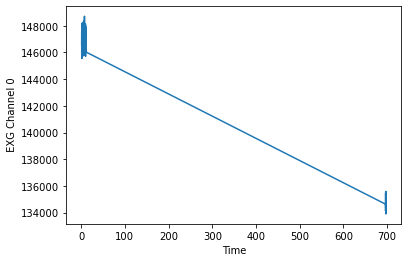

In [179]:
# plot = pd.DataFrame({'X':np.linspace(0,360,361), 'Y':[np.sin(2*np.pi*(i) / 360) for i in range(361)]})
# sns.lmplot('X', 'Y', data=plot, fit_reg=False)


sns.lineplot('Time', " EXG Channel 0", data=egg_df) #fix the fact that the EXG data is stored as a string type variable

In [180]:
import plotly.express as px
import plotly.graph_objects as go

px.line(data_frame=egg_df, x='Time', y=' EXG Channel 0')

In [176]:
# Attempt to high-pass filter data
import scipy.signal as signal
import matplotlib.pyplot as plt

low_cut_fq = 1 # Hz
n_chns = 16

X = egg_df['Time']
Y = egg_df[' EXG Channel 6']

b, a = signal.butter(2, low_cut_fq, 'high', fs=sample_rate)
Y = signal.filtfilt(b, a, Y)

filt_df = pd.DataFrame()
filt_df['Time'] = egg_df['Time']
for i in range(n_chns):
    b, a = signal.butter(2, low_cut_fq, 'high', fs=sample_rate)
    filt_df['EXG_Channel_'+str(i)] = signal.filtfilt(b, a, egg_df[' EXG Channel '+str(i)])

# Crop data at 1 second
filt_df = filt_df.drop(range(125))
    
# plt.plot(X, Y)
# plt.xlim([5, 30])
# plt.ylim([-200, 200])

px.line(data_frame=filt_df, x='Time', y='EXG_Channel_6', render_mode='webgl')

In [165]:
# get a vector of fft features for one channel
fft = np.real(scipy.fft.rfft(np.array(filt_df['EXG_Channel_6'])))

print(len(fft))

timestep = 1/sample_rate
x_fq = np.fft.rfftfreq(len(fft), d=timestep)

print(len(x_fq))

1978
990


In [166]:
zero_fq_idx = math.floor(len(fft)/2 - 1)
fft = fft[zero_fq_idx:]

print(len(fft))
print(len(x_fq))

990
990


In [167]:
plot_df = {'fft':fft, 'x_fq':x_fq}

px.line(data_frame=plot_df, x='x_fq', y='fft')

(0.0, 20.0)

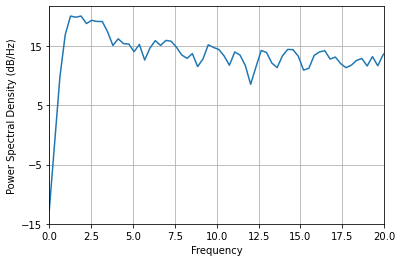

In [169]:
data = np.array(filt_df['EXG_Channel_6'])

plt.psd(data, NFFT=int(len(data)/10), Fs=sample_rate)
plt.xlim([0, 20])